In [2]:
import psycopg2
from configobj import ConfigObj
import sys
import os
import gdal
import json
import datetime
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline


In [13]:
cfg = ConfigObj("sites/bavaria.site")

with open('cfg/bands.json') as data_file:
    bandcfg = json.load(data_file)

rastertable="bavaria"
tiletable="tiles240"
    
conn = psycopg2.connect('postgres://{}:{}@{}/{}'.format(os.environ["POSTGIS_USER"],os.environ["POSTGIS_PASSWORD"],cfg['dbhost'],cfg['dbase']))
curs = conn.cursor()

tileid=500
date=datetime.datetime(2016,5,2)
rtype="20m"
level="L1C"
#bands=["B2","B3","B4","B8"]
#bands=["B12"]

# allbands
bands=bandcfg[level][rtype]



In [14]:
from patchfactory import queryRaster, queryDates
import pylab

def plot(tileid,date,level):
    print date
    
    def m(rtype):

        def toidx(bands):
            return[bandcfg[level][rtype].index(b)+1 for b in bands]

        allbands=bandcfg[level][rtype]
        return queryRaster(conn,rastertable,tiletable, tileid, date, rtype, level, toidx(allbands)),allbands

    arr,bands = m("10m")

    fig,axs=plt.subplots(1,4,figsize=(14,10))
    i=0
    for ax in axs.reshape(-1):
        ax.imshow(arr[:,:,i])
        ax.set_title(bands[i])
        i+=1

    arr,bands = m("20m")
    fig,axs=plt.subplots(2,3,figsize=(10,6))
    i=0
    for ax in axs.reshape(-1):
        ax.imshow(arr[:,:,i])
        ax.set_title(bands[i])
        i+=1

    arr,bands = m("60m")
    fig,axs=plt.subplots(1,3,figsize=(9,6))
    i=0
    for ax in axs.reshape(-1):
        ax.imshow(arr[:,:,i],cmap=pylab.gray())
        ax.set_title(bands[i])
        i+=1

2016-04-29

        select
        	ST_astiff(ST_UNION(ST_CLIP(r.rast, t.geom)),ARRAY[1, 2, 3, 4])
        from
        	bavaria r, tiles240 t
        where
        	t.id=2000 and
            ST_INTERSECTS(r.rast,t.geom) and
            r.type='10m' and
            r.level='L1C' and
            date='2016-04-29'
        

        select
        	ST_astiff(ST_UNION(ST_CLIP(r.rast, t.geom)),ARRAY[1, 2, 3, 4, 5, 6])
        from
        	bavaria r, tiles240 t
        where
        	t.id=2000 and
            ST_INTERSECTS(r.rast,t.geom) and
            r.type='20m' and
            r.level='L1C' and
            date='2016-04-29'
        

        select
        	ST_astiff(ST_UNION(ST_CLIP(r.rast, t.geom)),ARRAY[1, 2, 3])
        from
        	bavaria r, tiles240 t
        where
        	t.id=2000 and
            ST_INTERSECTS(r.rast,t.geom) and
            r.type='60m' and
            r.level='L1C' and
            date='2016-04-29'
        


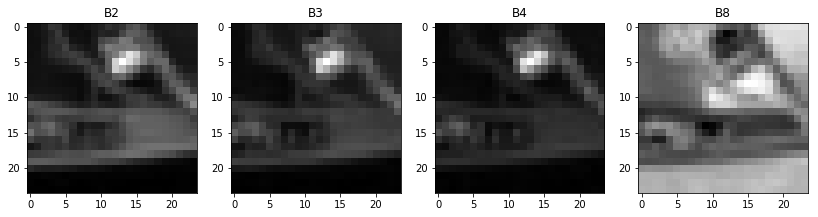

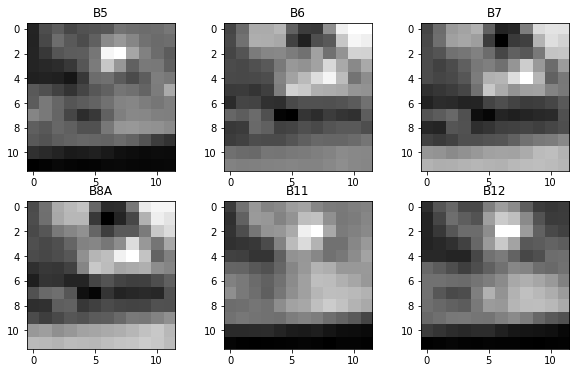

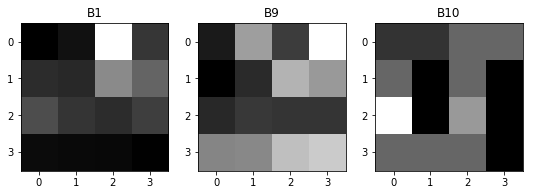

In [18]:
dates = queryDates(conn,"bavaria")["date"].sort_values().values

plot(2000,dates[9],level)

In [7]:
dates = queryDates(conn,"bavaria")["date"]

In [8]:
dates.sort_values()

8     2016-01-03
9     2016-01-13
1     2016-01-20
12    2016-02-12
13    2016-03-11
4     2016-03-20
11    2016-04-03
10    2016-04-13
3     2016-04-19
7     2016-04-29
2     2016-05-02
6     2016-05-10
5     2016-05-22
0           None
Name: date, dtype: object

In [12]:
dates.sort_values(by="date")

,date
15,2016-01-03
3,2016-01-13
11,2016-01-20
44,2016-02-12
45,2016-03-11
27,2016-03-20
35,2016-04-03
16,2016-04-13
2,2016-04-19
39,2016-04-29
